In [70]:
library(tidyverse)
library(repr)
library(tidymodels)
library(readr)
library(ggplot2)
library(RColorBrewer)
options(repr.matrix.max.rows = 6)

In [71]:
player_data <- read_csv("https://github.com/wendyyy1019/Individual_Project_Planning/raw/refs/heads/main/players%20.csv")
player_data
sessions_data <- read_csv("https://github.com/wendyyy1019/Individual_Project_Planning/raw/refs/heads/main/sessions.csv")
sessions_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


player_data: 
-  There are 196 observations with 7 variables, summarizing player information.
-  Numerical data contains played hours and age, character data contains level of experience, hashedemail (user identifier), name, and gender, logical data contains status of subscription.
-  gender and experience could potentially be converted into factor data as they are categorical with limited number of values
-  The age column has missing (NA) values and might have false reported information
-  The gender column also has falsely reported or hidden information such as prefered not to say and other
-  A played hour of 0.0 might indicate unactivated account, thus should not be taken into consideration


sessions_data:
-  There are 1535 obsevrations with 5 variables, summarizing gaming sessions
-  character data contains hashedemail, start time and end time of gaming, numerical data contains original start time and original end time in UNIX timestamp format tracked by seconds.
-  start time and end time column are not tidy as they contains mutiple measurments including date, month, year, and time
-  e+12 could be included into the vraible as an unit so original start and end time could be a single value.

Questions:
<br>
I will investigate on the borad quesiton Q1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?
<br>
#### My specific question: Can total played hours and age predict subscription in the players dataset?
-  I will need to select subscribe, age, and played_hours to extract from player_data
-  Missing values in the age and gender variable need to be removed
-  Character data experience, subscribe, and gender need to be converted into factor data (categorical)
-  Then the data will be able to be used in KNN classification models

In [124]:
tidy_player<- player_data|>
        mutate(experience = factor(experience), gender = factor(gender),subscribe=factor(subscribe))
tidy_player

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<fct>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [125]:
mean_values<-player_data|>
        select(played_hours,Age)|>
        map_dfr(mean,na.rm= TRUE)
mean_values

played_hours,Age
<dbl>,<dbl>
5.845918,20.52062


Here is the table for mean values for quantitative variable in players.csv data set:
| Quantitative variable | Mean |
|------------------------|-----|
| played hours | 5.845918 |
| Age | 20.52062 |

List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 15
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


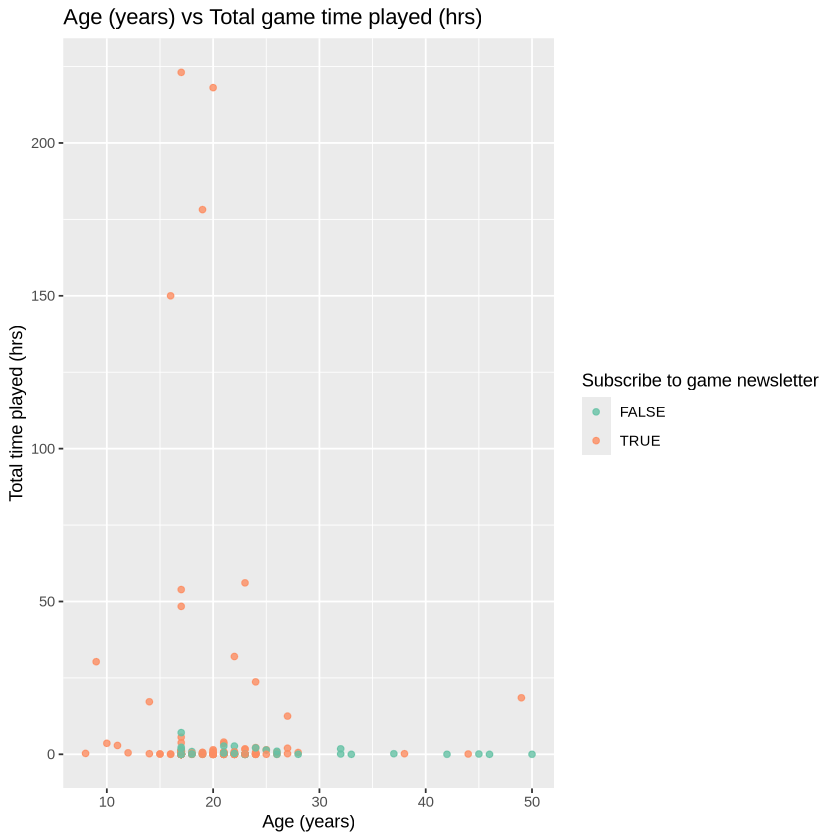

In [126]:
options(repr.width.plot = 18, repr.height.plot = 18)

player_plot <- tidy_player |> 
ggplot(aes(x = Age, y = played_hours, color = subscribe)) + 
geom_point(alpha = 0.8) + 
labs(title = "Age (years) vs Total game time played (hrs)", x = "Age (years)", y = "Total time played (hrs)", color = "Subscribe to game newsletter") + 
scale_color_brewer(palette = "Set2")
theme(text = element_text(size = 15))

player_plot

Due to outliers at the extremities, it’s difficult to visualize and evaluate this graph. However, the general trend seems like a younger age player with more time played tend to subscribe to the game newsletter more.

Plan:
<br>
Using KNN classification model is reasonable as the classification model predicts a categorical class (sometimes called a label) for an observation given its other variables (sometimes called features), where the categorical class is subscribe and the other two features are age and total hours played.
<br>
<br>
Assumptions:
<br>
Numerical data needs to be standardized for calculating distance,cross-validation is needed to select the optimal k-nearest neighbor
<br>
<br>
Limitations:
<br>
KNN requires storing the entire dataset and computing distances for every prediction, so if the dataset is large, it becomes slow to make predictions.
<br>
<br>
Compare & Select:
<br>
I will calculate the accuracy of the model and use the confusion matrix to find out the kinds of mistakes the classifier tends to make.
<br>
<br>
Data Processing:
<br>
I will split player.csv dataset into 75% training and 25% testing sets, then standardize and build models on the training set, also perform the cross validation. Then I will predict using testing set and find accuracy and confusion matrix.
